## Spotify Hit Prediction Dataset 



In [11]:
import numpy as np 
from numpy import mean
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import random

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:

d_00 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-00s.csv',header=0,index_col=0)
d_10 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-10s.csv',header=0,index_col=0)
d_60 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-60s.csv',header=0,index_col=0)
d_70 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-70s.csv',header=0,index_col=0)
d_80 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-80s.csv',header=0,index_col=0)
d_90 = pd.read_csv('/Users/chloeling3/Desktop/the-spotify-hit-predictor-dataset/dataset-of-90s.csv',header=0,index_col=0)

data = pd.concat([d_00, d_10, d_60, d_70, d_80, d_90])

In [6]:
data.info

<bound method DataFrame.info of                                                artist  \
track                                                   
Lucky Man                           Montgomery Gentry   
On The Hotline                           Pretty Ricky   
Clouds Of Dementia                         Candlemass   
Heavy Metal, Raise Hell!                Zwartketterij   
I Got A Feelin'                      Billy Currington   
...                                               ...   
(You're A) Go Nowhere                    Reagan Youth   
La Fiebre de Norma                       La Castañeda   
Good Times                              Edie Brickell   
Inane                                           KMFDM   
You Can Make History (Young Again)         Elton John   

                                                                     uri  \
track                                                                      
Lucky Man                           spotify:track:4GiXBCUF7H6YfNQsnBRIzl  

In [7]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [8]:
data.keys()

Index(['artist', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [12]:
df = data.loc[:, ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]
correlation_matrix = df.corr()
print (correlation_matrix)

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.206128  0.015433  0.274160 -0.032743   
energy                0.206128  1.000000  0.022523  0.772628 -0.033780   
key                   0.015433  0.022523  1.000000  0.008438 -0.140455   
loudness              0.274160  0.772628  0.008438  1.000000  0.000509   
mode                 -0.032743 -0.033780 -0.140455  0.000509  1.000000   
speechiness           0.156452  0.122430  0.026515  0.069241 -0.059636   
acousticness         -0.261252 -0.715088 -0.024178 -0.566548  0.049961   
instrumentalness     -0.301915 -0.208153 -0.013101 -0.374301 -0.075992   
liveness             -0.115251  0.157779  0.000668  0.086708  0.008886   
valence               0.553858  0.341427  0.007742  0.271775  0.035636   
tempo                -0.066541  0.224018  0.001154  0.169453  0.027053   
duration_ms          -0.063030  0.011830  0.015493 -0.049890 -0.074828   
time_signature        0.191664  0.1960

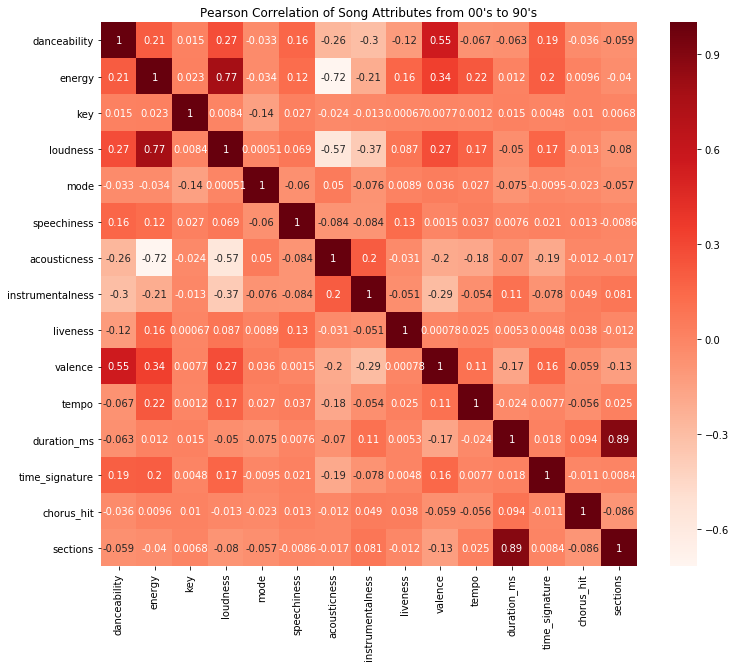

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds).set_title("Pearson Correlation of Song Attributes from 00's to 90's")
plt.show()


In [14]:
feature_names = list(data.columns.values)
feature_names.remove('target')
feature_names.remove('artist')
feature_names.remove('uri')
X = data[feature_names]
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [15]:
# summarize class distribution
counter = Counter(Y_train)
print(counter)

# The dataset is balanced, so no need to apply techniques to transform it (ie. SMOTE)

Counter({0: 16514, 1: 16370})


In [16]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN) 
    
    print('Sensitivity : ', TPR)
    print('Specificity : ', TNR)
    print('Precision : ', PPV)
    print('Negative predictive value : ', NPV)
    print('False positive rate : ', FPR)
    print('False negative rate : ', FNR)
    print('False discovery rate : ', FDR)
    print('Accuracy : ', ACC)

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=8)

In [18]:
def model_auc(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=8)
    scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    return (scores, score)

In [19]:
def model_cm(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=8)
    Y_pred = cross_val_predict(model, X, Y, cv=cv, n_jobs=-1)
    cm = confusion_matrix(Y, Y_pred)
    return cm

## Logistic Regression AUC

In [20]:
# Train model 
log_model = LogisticRegression(solver = 'liblinear')
scores = cross_val_score(log_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = log_model.fit(X_train, Y_train).predict(X_test)

In [21]:
print('Logistic Regression Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('Logistic Regression Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

Logistic Regression Mean ROC AUC (Training Set): 0.650 (+/- 0.019)
Logistic Regression Mean ROC AUC (Testing Set): 0.603


In [22]:
cm_log = confusion_matrix(Y_test, Y_pred)
print(cm_log)

[[2280 1759]
 [1498 2685]]


In [23]:
performance(cm_log)

Sensitivity :  0.6418838154434616
Specificity :  0.5644961624164397
Precision :  0.6041854185418541
Negative predictive value :  0.6034939121228163
False positive rate :  0.43550383758356026
False negative rate :  0.3581161845565384
False discovery rate :  0.3958145814581458
Accuracy :  0.603867672099246


In [24]:
## Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      4039
           1       0.60      0.64      0.62      4183

    accuracy                           0.60      8222
   macro avg       0.60      0.60      0.60      8222
weighted avg       0.60      0.60      0.60      8222



## Gaussian NB AUC


In [25]:
# Train model 
gnb_model = GaussianNB()
scores = cross_val_score(gnb_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = gnb_model.fit(X_train, Y_train).predict(X_test)

In [26]:
print('Gaussian NB Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('Gaussian NB Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

Gaussian NB Mean ROC AUC (Training Set): 0.702 (+/- 0.020)
Gaussian NB Mean ROC AUC (Testing Set): 0.620


In [27]:
cm_gnb = confusion_matrix(Y_test, Y_pred)
print(cm_gnb)

[[1266 2773]
 [ 309 3874]]


In [28]:
performance(cm_gnb)

Sensitivity :  0.9261295720774564
Specificity :  0.3134439217628126
Precision :  0.582819316985106
Negative predictive value :  0.8038095238095239
False positive rate :  0.6865560782371875
False negative rate :  0.07387042792254363
False discovery rate :  0.4171806830148939
Accuracy :  0.6251520311359766


In [29]:
## Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.31      0.45      4039
           1       0.58      0.93      0.72      4183

    accuracy                           0.63      8222
   macro avg       0.69      0.62      0.58      8222
weighted avg       0.69      0.63      0.59      8222



## Support Vector Machine AUC 

In [ ]:
# Train model 
# svm_model = svm.SVC(gamma='auto', probability=True)

svm_model = svm.SVC(gamma='auto', probability=True)
scores = cross_val_score(svm_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = svm_model.fit(X_train, Y_train).predict(X_test)

In [ ]:
print('SVM Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('SVM Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

In [ ]:
cm_svm = confusion_matrix(Y_test, Y_pred)
print(cm_svm)

In [ ]:
performance(cm_svm)

In [ ]:
## Classification Report 
print(classification_report(Y_test, Y_pred))

## MLP AUC 

In [30]:
#solver='lbfgs',
mlp_model = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=8)

#mlp_model = MLPClassifier()
scores = cross_val_score(mlp_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = mlp_model.fit(X_train, Y_train).predict(X_test)

In [31]:
print('MLP Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('MLP Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

MLP Mean ROC AUC (Training Set): 0.500 (+/- 0.000)
MLP Mean ROC AUC (Testing Set): 0.500


In [32]:
cm_mlp = confusion_matrix(Y_test, Y_pred)
print(cm_mlp)

[[4039    0]
 [4183    0]]


In [33]:
performance(cm_mlp)

Sensitivity :  0.0
Specificity :  1.0
Precision :  nan
Negative predictive value :  0.49124300656774506
False positive rate :  0.0
False negative rate :  1.0
False discovery rate :  nan
Accuracy :  0.49124300656774506


/Users/chloeling3/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/Users/chloeling3/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [34]:
## Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4039
           1       0.00      0.00      0.00      4183

    accuracy                           0.49      8222
   macro avg       0.25      0.50      0.33      8222
weighted avg       0.24      0.49      0.32      8222



/Users/chloeling3/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest AUC 

In [35]:
rf_model = RandomForestClassifier(max_depth=2, random_state=8)
scores = cross_val_score(rf_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = rf_model.fit(X_train, Y_train).predict(X_test)

In [36]:
print('Random Forest Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('Random Forest Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

Random Forest Mean ROC AUC (Training Set): 0.807 (+/- 0.013)
Random Forest Mean ROC AUC (Testing Set): 0.723


In [37]:
cm_rf = confusion_matrix(Y_test, Y_pred)
print(cm_rf)

[[2442 1597]
 [ 665 3518]]


In [38]:
performance(cm_rf)

Sensitivity :  0.841023189098733
Specificity :  0.6046051002723446
Precision :  0.6877810361681329
Negative predictive value :  0.7859671709044094
False positive rate :  0.39539489972765535
False negative rate :  0.15897681090126703
False discovery rate :  0.31221896383186704
Accuracy :  0.7248844563366578


In [39]:
# Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68      4039
           1       0.69      0.84      0.76      4183

    accuracy                           0.72      8222
   macro avg       0.74      0.72      0.72      8222
weighted avg       0.74      0.72      0.72      8222



Text(0, 0.5, 'Error Rate')

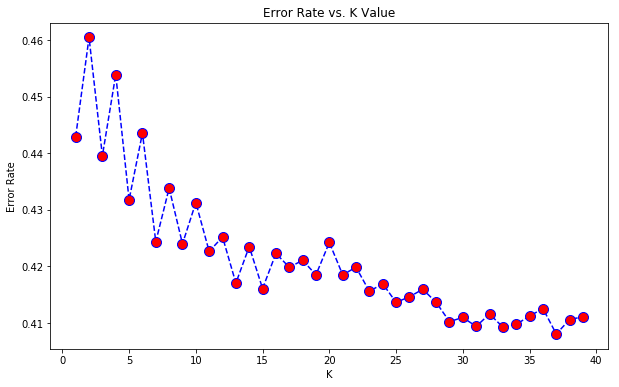

In [42]:
## Chosing a K value using the elbow method 

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i) # create the model 
    knn.fit(X_train,Y_train) # fit the model 
    pred_i = knn.predict(X_test) # predict 
    error_rate.append(np.mean(pred_i != Y_test)) # average error rate 
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## KNN AUC 

In [43]:
## KNN AUC 

knn_model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)


Y_pred = knn_model.fit(X_train, Y_train).predict(X_test)

In [44]:
print('KNN Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('KNN Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

KNN Mean ROC AUC (Training Set): 0.591 (+/- 0.018)
KNN Mean ROC AUC (Testing Set): 0.560


In [45]:
cm_knn = confusion_matrix(Y_test, Y_pred)
print(cm_knn)

[[2091 1948]
 [1666 2517]]


In [46]:
performance(cm_knn)

Sensitivity :  0.6017212526894573
Specificity :  0.5177024015845506
Precision :  0.5637178051511759
Negative predictive value :  0.5565610859728507
False positive rate :  0.4822975984154494
False negative rate :  0.3982787473105427
False discovery rate :  0.4362821948488242
Accuracy :  0.5604475796643152


In [47]:
# Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      4039
           1       0.56      0.60      0.58      4183

    accuracy                           0.56      8222
   macro avg       0.56      0.56      0.56      8222
weighted avg       0.56      0.56      0.56      8222



## AdaBoost AUC

In [48]:
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=8)
scores = cross_val_score(adaboost_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = adaboost_model.fit(X_train, Y_train).predict(X_test)

In [49]:
print('Adaboost Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('Adaboost Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

Adaboost Mean ROC AUC (Training Set): 0.839 (+/- 0.011)
Adaboost Mean ROC AUC (Testing Set): 0.751


In [50]:
cm_adaboost = confusion_matrix(Y_test, Y_pred)
print(cm_adaboost)

[[2764 1275]
 [ 765 3418]]


In [51]:
performance(cm_adaboost)

Sensitivity :  0.8171169017451589
Specificity :  0.6843278039118593
Precision :  0.7283187726401023
Negative predictive value :  0.7832247095494475
False positive rate :  0.3156721960881406
False negative rate :  0.18288309825484103
False discovery rate :  0.2716812273598977
Accuracy :  0.7518851860861104


In [52]:
# Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      4039
           1       0.73      0.82      0.77      4183

    accuracy                           0.75      8222
   macro avg       0.76      0.75      0.75      8222
weighted avg       0.76      0.75      0.75      8222



In [53]:
adaboost_model.feature_importances_

array([0.1 , 0.07, 0.06, 0.09, 0.01, 0.09, 0.16, 0.12, 0.01, 0.09, 0.06,
       0.08, 0.01, 0.03, 0.02])

## Gradient Boosting AUC 

In [54]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=8)
scores = cross_val_score(gb_model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

Y_pred = gb_model.fit(X_train, Y_train).predict(X_test)

In [55]:
print('Gradient Boosting Mean ROC AUC (Training Set): %.3f (+/- %0.3f)' % (np.mean(scores), np.std(scores) *2))
print('Gradient Boosting Mean ROC AUC (Testing Set): %.3f' % roc_auc_score(Y_test, Y_pred))

Gradient Boosting Mean ROC AUC (Training Set): 0.841 (+/- 0.012)
Gradient Boosting Mean ROC AUC (Testing Set): 0.753


In [56]:
cm_gb = confusion_matrix(Y_test, Y_pred)
print(cm_gb)

[[2782 1257]
 [ 761 3422]]


In [57]:
performance(cm_gb)

Sensitivity :  0.818073153239302
Specificity :  0.6887843525625155
Precision :  0.7313528531737551
Negative predictive value :  0.7852102737792831
False positive rate :  0.31121564743748453
False negative rate :  0.18192684676069806
False discovery rate :  0.2686471468262449
Accuracy :  0.7545609340792995


In [58]:
# Classification Report 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73      4039
           1       0.73      0.82      0.77      4183

    accuracy                           0.75      8222
   macro avg       0.76      0.75      0.75      8222
weighted avg       0.76      0.75      0.75      8222



# Feature Importance (Feature Selection) 

## Recursive Feature Elimination (Wrapper Method)

In [59]:
# Feature Importance 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd 

random.seed(8) 
rfe_selector = RFE(estimator=LogisticRegression(solver = 'liblinear'), n_features_to_select= 20, step=20, verbose=5)
rfe_selector.fit(X_train, Y_train)
rfe_support = rfe_selector.get_support()

df_X = pd.DataFrame(X_train)
df_Y = pd.DataFrame(Y_train)

rfe_feature = df_X.iloc[:,rfe_support].columns.tolist()
print(rfe_feature)
print(str(len(rfe_feature)), 'selected features')

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']
15 selected features


[0.09552032 0.08421548 0.04490547 0.06763248 0.01333605 0.05975739
 0.10441328 0.17618414 0.05027219 0.07326112 0.0515835  0.06278739
 0.01472875 0.04899885 0.0524036 ]


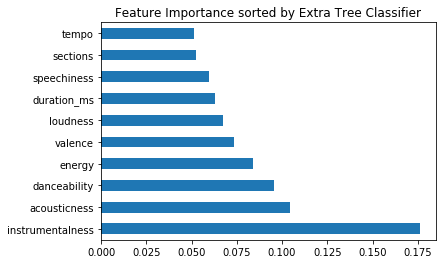

In [61]:
## Used Extra Tree Classifier to extract the top 3 features of the dataset 
## Decision trees make splits that maximize the decrease in impurity 
## By calculating the mean decrease in impurity for each feature across all trees, we can know that feature's importance 

X = data[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]                                         
y = data['target']

from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers 

#plot 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance sorted by Extra Tree Classifier')
plt.show()

## could we select those features with more than 0.01 for model training? 

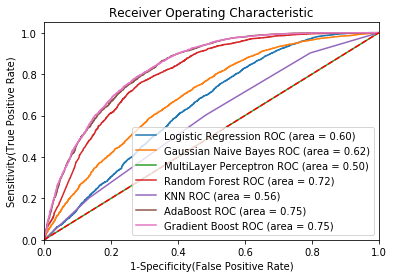

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': log_model,
},
{
    'label': 'Gaussian Naive Bayes',
    'model': gnb_model,
}, 
{
    'label': 'MultiLayer Perceptron',
    'model': mlp_model,
}, 
{
    'label' : 'Random Forest',
    'model': rf_model,
}, 
{
    'label': 'KNN',
    'model': knn_model,
    
},
{
    'label': 'AdaBoost',
    'model': adaboost_model,
    
},
{
    'label': 'Gradient Boost',
    'model': gb_model,   
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    y_pred = model.predict(X_test) # predict the test data
    
        
# Compute False postive rate, and True positive rate
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test, model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display


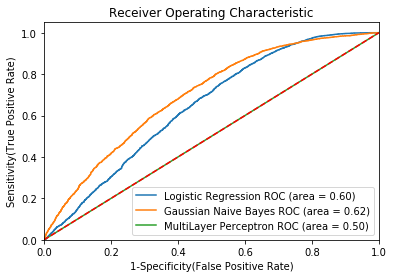

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': log_model,
},
{
    'label': 'Gaussian Naive Bayes',
    'model': gnb_model,
}, 
{
    'label': 'MultiLayer Perceptron',
    'model': mlp_model,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    y_pred = model.predict(X_test) # predict the test data
    
        
# Compute False postive rate, and True positive rate
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test, model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display


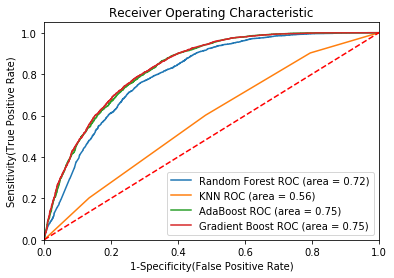

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label' : 'Random Forest',
    'model': rf_model,
}, 
{
    'label': 'KNN',
    'model': knn_model,
    
}, 
{
    'label': 'AdaBoost',
    'model': adaboost_model,
    
},
{
    'label': 'Gradient Boost',
    'model': gb_model,   
}    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    y_pred = model.predict(X_test) # predict the test data
    
        
# Compute False postive rate, and True positive rate
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test, model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
